# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.


In [ ]:
# A dictionary that indicates the order of concepts that we are going to cover
what_were_covering = {1:"data (Prepare and load)",
                      2:"build model",
                      3:"fitting the model to data (training) ",
                      4:"making predictions and evaluating a model (inference)",
                      5:"saving and loading a model",
                      6:"putting it all together"}

In [ ]:
import torch
from torch import nn # nn contains all the Pytorch's building blocks for nns
import matplotlib.pyplot as plt


# Check PyTorch version
torch.__version__


'2.2.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything ...in machine learning

* Excel spreadsheet
* Images of any kind
* Videos
* Audios like songs and podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns within the numbers.

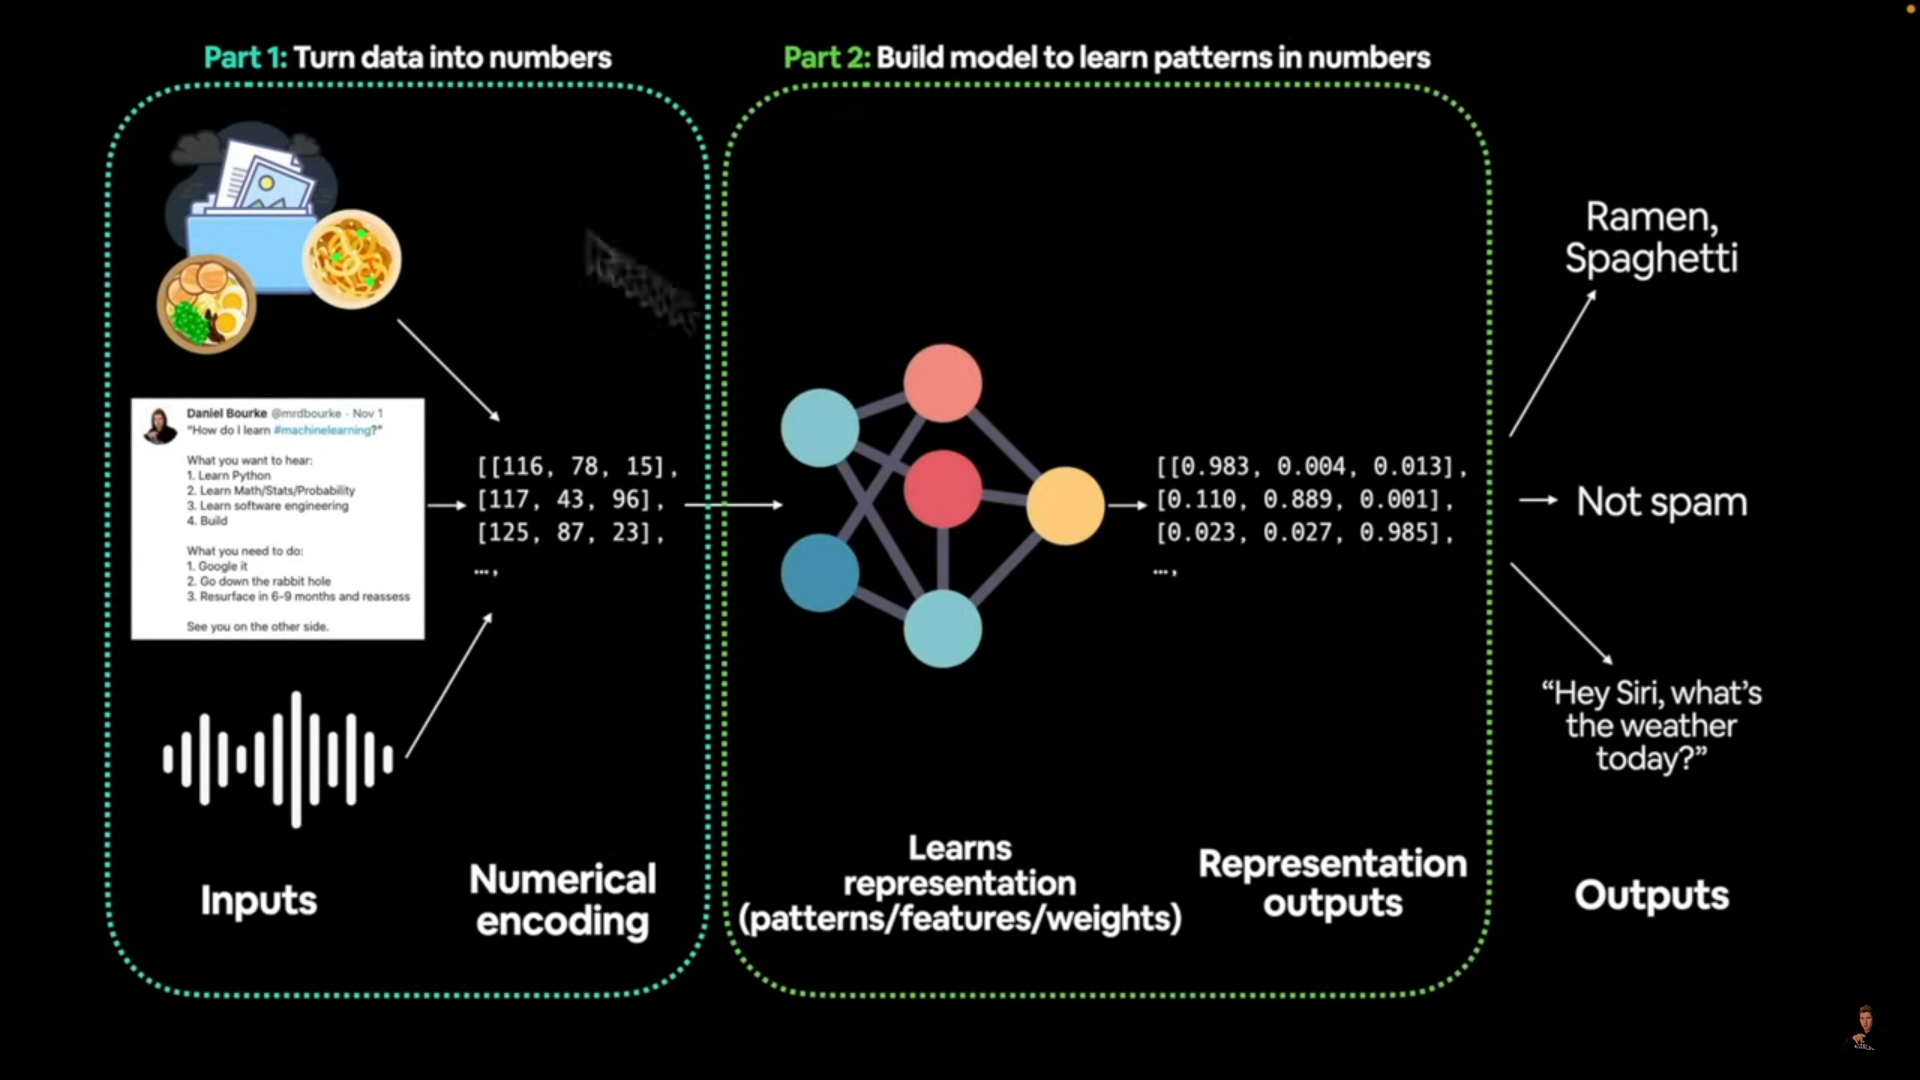



To showcase this, let's create some known data using linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
# torch.arange gives us a tensor with 50 values. shape being [50]
# With torch.unsqueeze() we add a dimension 1 to the X at pos=1
# there by creating 50 rows of one-valued tensors
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into train and test sets

Let's create a training and test set with our data


In [ ]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in

"Visualize, Visualize and Visualize"

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compare predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in green
  plt.scatter(test_data,test_labels,c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14}); #prop -> properties

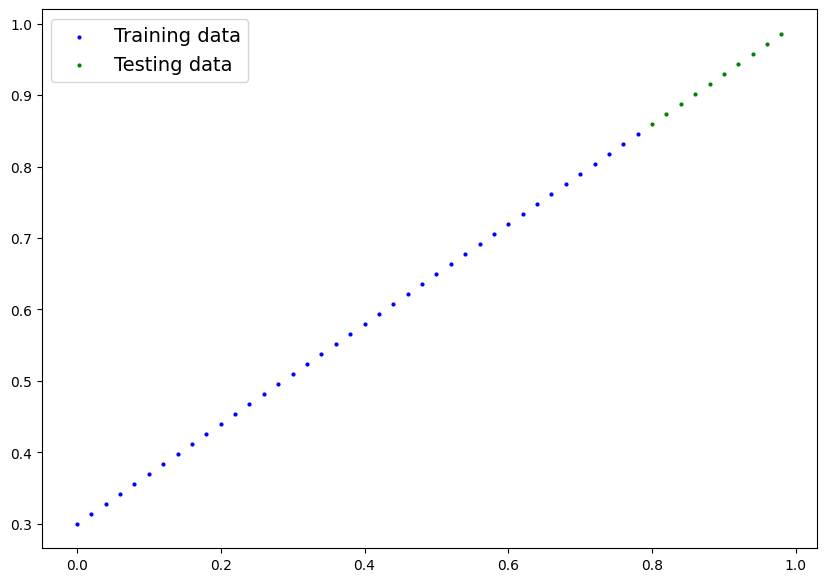

In [ ]:
plot_predictions();

## 2. Build a model

Our first pyTorch model!!

What does our model do?

* It starts with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) tht ideal values (the weight and bias values we used to create the data)

How does it do?
1. Gradient Descent
2. Back propogation

Gradient descent is the reason we have set the requires_grad = True in the following piece of code

In [ ]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # -> Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- Can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype float32

    self.bias = nn.Parameter(torch.randn(1,  # <- Start with a random bias and get close to the ideal bias
                                         requires_grad=True,  # <- Can this parameter be adjusted via gradient descent?
                                         dtype=torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor: #  <- "x" is the input data
    return self.weights * x + self.bias # Linear regression formula

# Any subclass of nn.Module requires the override of forward() function
# This does the computation of the model

## PyTorch model building essentials

* torch.nn -> contains all the buildings for computational graphs (a neural network can be considered as a computational graph)
* torch.nn.Parameter -> what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module -> the base class for all the neural network modules, if you subclass it, you should overwrite forward()
* torch.optim -> this is where the optimizers in PyTorch live, they will help with Gradient descent
* def forward() -> All nn.Module subclasses require you to overwrite forward(). This is where the computation of the model happens

### Checking the contents of our PyTorch model

Now we've created the model, let us see what's inside ...

So, we can check our model parameters or what's inside our model using `.parameters()`

In [ ]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` from `x_test`

When we pass data through our model, it's going to run it through the forward() method


In [ ]:
# We can get the predictions using the following piece of code directly

y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model in torch.inference_mode()

with torch.inference_mode():
  y_preds = model_0(X_test)

# # You can also do this with torch.no_grad(), however, inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

We can see that we got the same result whether we have used inference mode or not. But, it is good to make a habit of using inference mode.
* Without inference mode we can see aa gradient function as well. We don't see that when we have executed in inference_mode().
* Hence, we can infer that with the use of inference_mode(), the model does not keep track of parameters and gradient values. We don't need that as we are just inferencing. This makes it faster for us to obtain the inferred values.

This makes it a good practice to use the torch.inference_mode() always when we are getting values from the model !!!

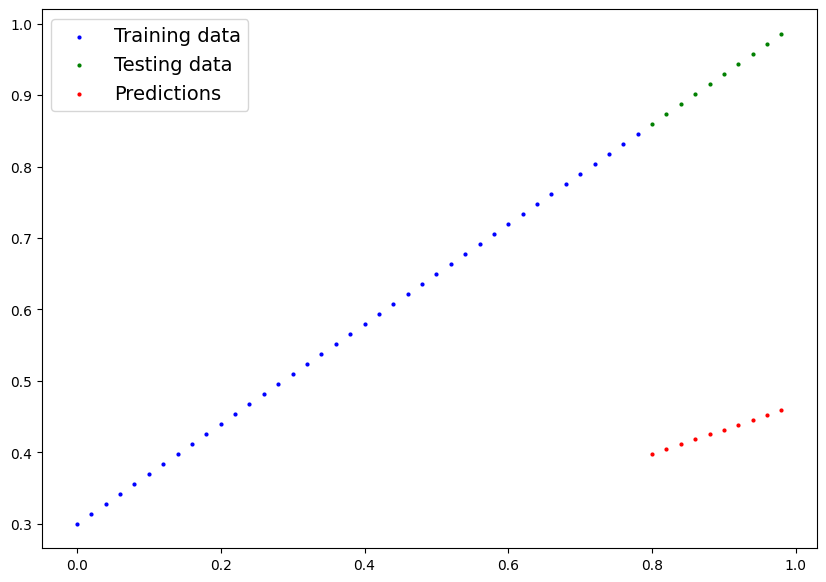

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train a model

The whole idea of model is to move from a poor representation of the data to a better representation of data.

One way to measure how poor or how wrong your models predictions are to use a loss function.

Loss function or a Cost function or criterion are the same. cost function is typically the sum of the loss functions of all the training samples

**Loss function:** Function to determine how wrong our model is. There are many kinds of loss functions and we choose it based on the problem e.g, L1 Loss, Binary cross entropy loss, L2 Loss etc..

**Optimizer:** An optimizer changes the parameters (e.g., weight and bias) to better suit the model, i.e., to reduce the loss of the model

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function

# L1 Loss -> mean absolute error
loss_fn = nn.L1Loss()

# Set up an optimizer (Stochastic Gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr=learning rate=most important hyperparameter
loss_fn,optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

Q. Which loss function should I use?

For a simple linear regression problem like this, L1Loss loss function and SGD optimizer would suffice.

But, for a classification problem, we'd use BCE Loss function

### Building a training loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called as forward propogation
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of the model with respect to the loss (**back propogation**)
5. Optimizer step - Modifies the model's parameters to minimize the loss and better fit the training data

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)
# optimizer steps are random and hence, this seed will ensure a chosen randomness

# An epoch is one loop through the data... This a hyperparameter as we're setting this value
epochs = 200

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []


### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all the parameters that need gradients to `require gradients`

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)
  #print(f'Loss:{loss}')

  # loss_fn(inputs, targets) -> inputs are the predicted values of the neural network
  # targets are the actual values i.e., y_train

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propogation of the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (performs gradient descent)
  optimizer.step() # By default, how the optimizer changes will accumulate over the loop....so we have to zero them above in step3

  ### Testing
  model_0.eval() # modifies other settings in the model that we don't need when we are evaluating/testing the model(dropout/batchnorm layers)
  with torch.inference_mode():
  # with torch.no_grad()
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Training Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict
    print(model_0.state_dict())





Epoch:0 | Training Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Training Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Training Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Training Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Training Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Training Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Training Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight,bias

(0.7, 0.3)

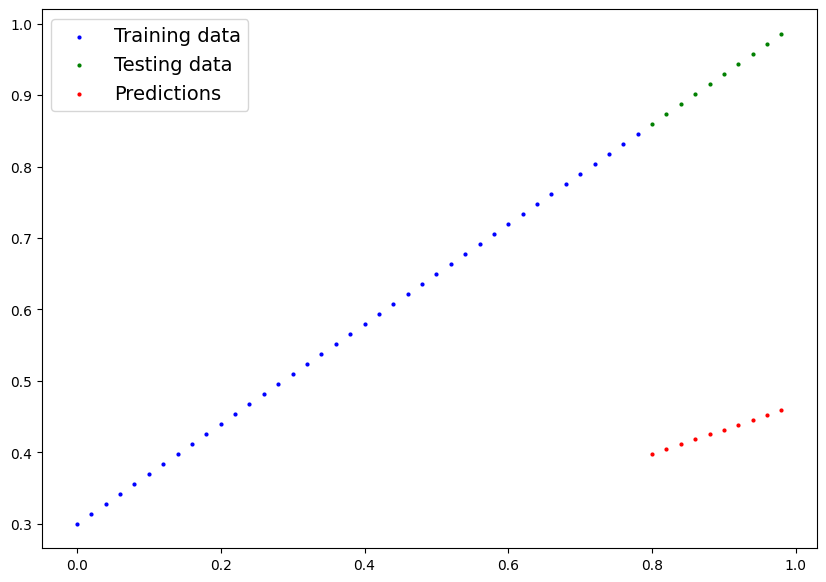

In [ ]:
plot_predictions(predictions=y_preds)
# The plot with the initial values of the model that have been selected randomly

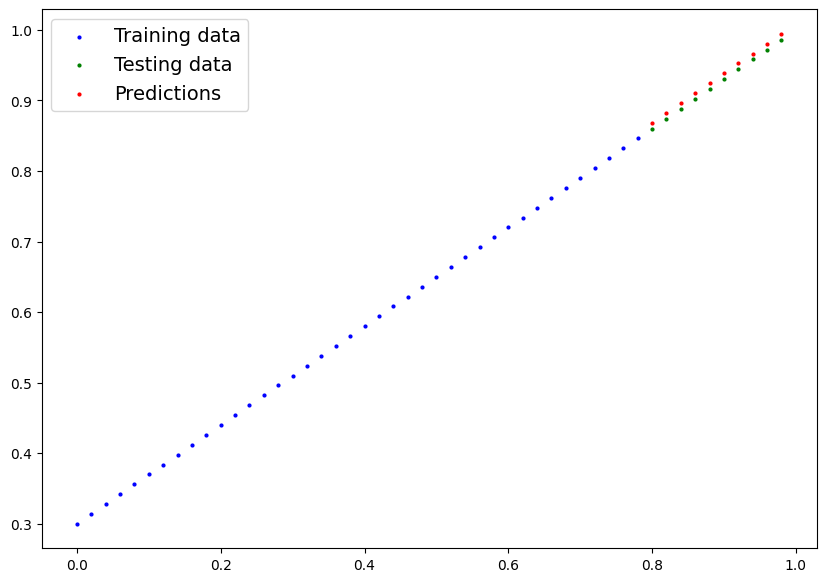

In [ ]:
plot_predictions(predictions=test_pred)

We can see that the predictions moved closer to the original test values

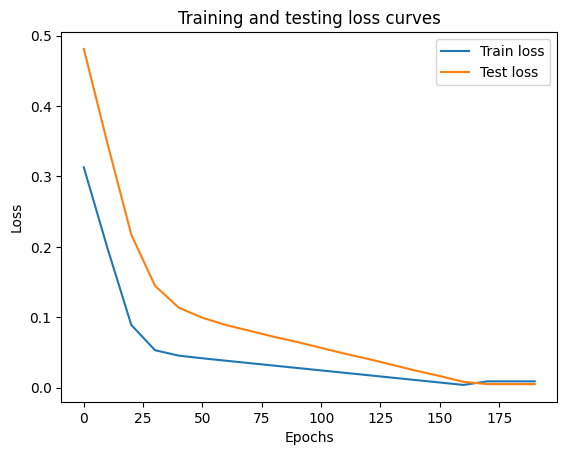

In [ ]:
# Plot the loss curves

# train_loss_values and test_loss_values are lists of tensor values in gradients attached
# So, first we convert them into a proper tensor with tensor values and convert the whole thing into a numpy array
plt.plot(epoch_count,torch.tensor(train_loss_values).numpy(),label="Train loss")
plt.plot(epoch_count,torch.tensor(test_loss_values).numpy(),label="Test loss")
plt.title("Training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Saving a model in PyTorch

There are three main methods to save and load a model in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows us to load a model's saved state dictionary

Python's pickle module implements binary protocols for serializing and de-serializing a Python object structure.

**serializing** -> saving a model |
**de-serializing** -> Loading a model


In [ ]:
# Saving our PyTorch model
from pathlib import Path

# We can save the models in our google colab's working directory -> disappears after the session
# We can also save the models in our google drive

# 1. Create a model's directory
MODEL_PATH = Path("models") # saving the model to "models" file
MODEL_PATH.mkdir(parents=True,exist_ok=True) # exist_ok -> if it already exists it does not throw and error, it just replaces the previous one

# 2. Create model save path
MODEL_NAME = "01_PyTorch_ml_Regression_model_0.pth" # PyTorch objects usually have the extension .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#MODEL_SAVE_PATH
 # Just setting the path where we have to save the model

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



Saving model to: models/01_PyTorch_ml_Regression_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1710 Apr 27 18:41 01_PyTorch_ml_Regression_model_0.pth


### Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of out model class and load the saved `state_dict()` into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of the model_0 (this will update the new instance with the updated parameters)

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

We can see above that the loaded model has got initialized with random parameters.

In [ ]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
#torch.nn.Module.load_state_dict() - this allows us to load a model's saved state dictionary
# loaded_model_0 is an instantiation/object of the class LinearRegressionModel()
# LinearRegressionModel() is a subclass of nn.Module
# So, we can use the above syntax

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
loaded_model_preds == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

We can observe that the loaded model is same as the model_0 that we have saved

## 6. Putting it all together

Let's go back through the steps above and see it all in one place



In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1+cu121'

In [2]:
#Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device:{device}')

Using device:cuda


In [3]:
#!nvidia-smi # To check the properties of the GPU

### 6.1. Data

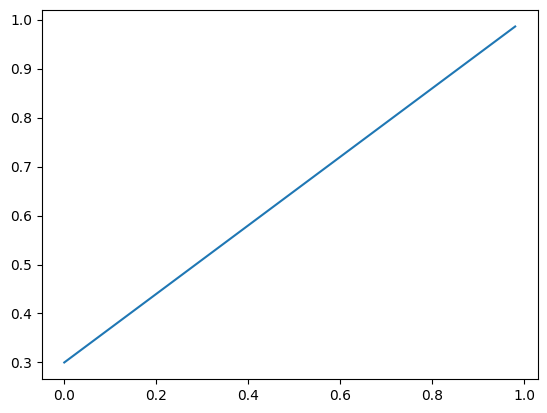

In [4]:
# Creating data and splitting into training and testing data for a linear regression model

# linear regression formula: y = weight * x + bias

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# Creating X and y X -> Features , y -> labels

X = torch.arange(start,end,step).unsqueeze(dim=1) # Unsqueeze is important
y = weight * X + bias

plt.plot(X,y)

In [5]:
# Split data
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [6]:
 # Plot the data using plot_predictions()
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")
  plt.legend(prop={"size":14});
  plt.show()

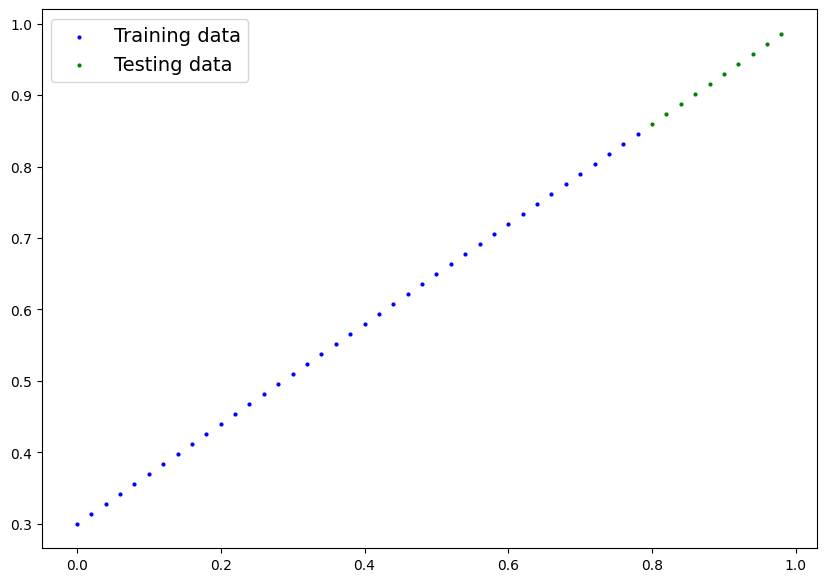

In [7]:
plot_predictions()

### 6.2 Building a PyTorch Linear model

We can notice that in our first version of the Linear regression model above, we have defined the parameters weights and bias to some random values using randn and created a forward pass function that does the forward pass with parameters as the randomly generated values above.

But, in this version2, `nn.Linear` does all the generation of the required parameters and forward pass function implementation

In [8]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters (Same as y=mx+c, Check documentation)
    # Also called: Linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) # input size=1, output size=1

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

# Instantiating a new model
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

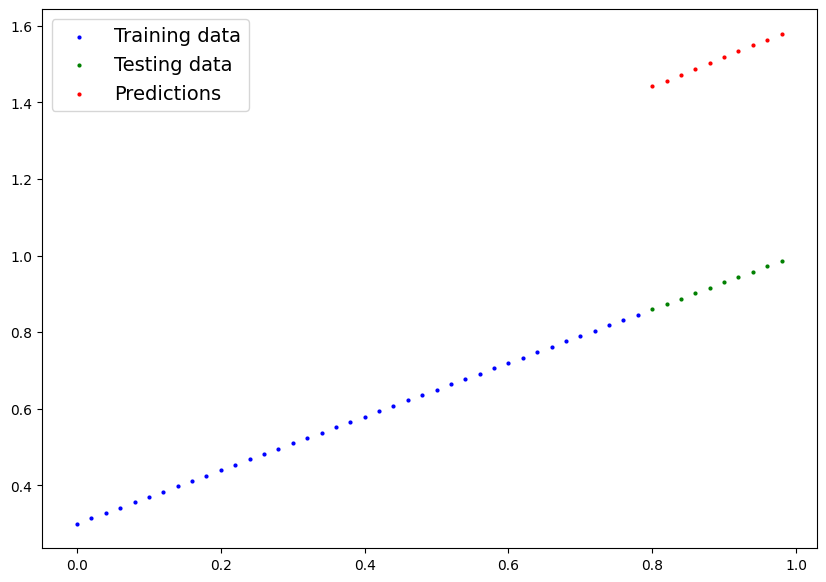

In [9]:
# Checking how good the model works on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

In [10]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

Note : Even with the GPU set up as default, the above code gives cpu as the device, as it is the actual default device

* To get the GPU as the target device one has to use `model.to()` as shown below. That will connect to GPU if GPU is available.

In [11]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

We should set up device agnostic code for data and model. In the above section, we have set up device agnostic code for the model. However, the following section sets up the device agnostic code for the data

In [14]:
# put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [15]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup out optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [16]:
# Training loop

torch.manual_seed(42)

epochs = 200
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):

  # Setup the model in training mode
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)

  # Calculate the loss
  train_loss = loss_fn(y_pred,y_train)
  #print(f'Loss:{loss}')

  # Optimizer zero grad
  optimizer.zero_grad()

  # Backward pass
  train_loss.backward()

  # Optimizer step step step
  optimizer.step()

  # Testing loop
  model_1.eval()
  with torch.inference_mode():

    # Do the forward pass
    test_pred = model_1(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(train_loss)
      test_loss_values.append(test_loss)

      print(f'Epoch:{epoch} | Training loss:{train_loss} | Test loss:{test_loss}'  )
      model_1.state_dict()


Epoch:0 | Training loss:0.5551779866218567 | Test loss:0.5739762187004089
Epoch:10 | Training loss:0.439968079328537 | Test loss:0.4392664134502411
Epoch:20 | Training loss:0.3247582018375397 | Test loss:0.30455657839775085
Epoch:30 | Training loss:0.20954833924770355 | Test loss:0.16984669864177704
Epoch:40 | Training loss:0.09433845430612564 | Test loss:0.03513690456748009
Epoch:50 | Training loss:0.023886388167738914 | Test loss:0.04784907028079033
Epoch:60 | Training loss:0.019956795498728752 | Test loss:0.045803118497133255
Epoch:70 | Training loss:0.016517987474799156 | Test loss:0.037530567497015
Epoch:80 | Training loss:0.013089174404740334 | Test loss:0.02994490973651409
Epoch:90 | Training loss:0.009653178043663502 | Test loss:0.02167237363755703
Epoch:100 | Training loss:0.006215683650225401 | Test loss:0.014086711220443249
Epoch:110 | Training loss:0.00278724217787385 | Test loss:0.005814164876937866
Epoch:120 | Training loss:0.0012645035749301314 | Test loss:0.013801801018

In [17]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [18]:
weight, bias

(0.7, 0.3)

In [23]:
# Evaluating the model and plotting the predictions and the test data

model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

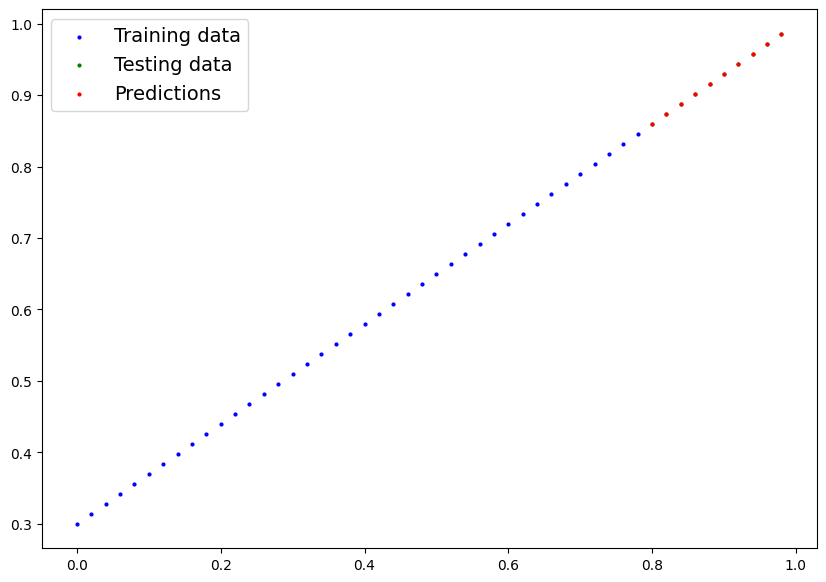

In [26]:
# Check out our model predictions visually
#plot_predictions(predictions=y_preds)
# The above line throws and error as y_pred is on GPU now and our plot prediction function uses numpy arrays on cpu

# So, the following modification is required
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a trained model


In [29]:
from pathlib import Path

# Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True) # exist_ok -> if it already exists it does not throw and error, it just replaces the previous one

# Create model save path
MODEL_NAME = "01_PyTorch_ml_Regression_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_PyTorch_ml_Regression_model_1.pth


In [31]:
# Load a PyTorch model

# Create a new instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device ### DEVICE AGNOSTIC
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [32]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [33]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')